# Determing Optimal Match Number for FDR Calculations (library peak max = 31)

## Libraries, Settings, Functions

In [1]:
import pandas as pd
import re
from matplotlib import pyplot
import csodiaq_base_functions as cbf
import csodiaq_figure_functions as cff
import csodiaq_menu_functions as menu
import os
import numpy as np
from matplotlib.font_manager import FontProperties
import statistics
pd.set_option('display.max_rows', None)

In [2]:
fontP = FontProperties()
fontP.set_size(24)
filePath = 'Data/Figures/FinalFigures/'

In [11]:
def fdr_calculation(df, fdrList=False):
    # initializing the two return values at 0
    fdrValues = []
    numDecoys = 0
    df.fillna("nan",inplace=True)
    # for every row in the dataframe
    for i in range(len(df)):
        # current criteria for 'decoys' is to have 'decoy' in the protein name. This may change in the future.
        if 'DECOY' in df.loc[i]['Name']:
            numDecoys += 1
        # calculates the FDR up to this point in the data frame.
        curFDR = numDecoys/(i+1)

        # conditional statement comparing the current FDR to the FDR Cutoff. If larger, function values are returned.
        if curFDR > 0.01:

            # if the number of rows has not yet reached the minimum number that allows for the FDR cutoff, 0 is returned instead.
            if len(fdrValues) < 1/0.01:
                if fdrList: return [], 0
                else: return 0, 0
            if fdrList: return fdrValues, numDecoys-1
            else: return len(fdrValues), numDecoys-1
        fdrValues.append(curFDR)
    if fdrList: return fdrValues, numDecoys-1
    else: return len(fdrValues), numDecoys-1
    
def set_plot_settings(xlabel, ylabel, wide=True):
    if wide: pyplot.figure(figsize=(18,12)).add_axes([0.15, 0.15, 0.5, 0.75])
    else: pyplot.figure(figsize=(12,12))
 #   pyplot.title(title, fontsize = 40)
    pyplot.axhline(linewidth=4, color='black')
    pyplot.axvline(linewidth=4, color='black')
    pyplot.xlabel(xlabel, fontsize = 36, weight='bold')
    pyplot.ylabel(ylabel, fontsize = 36, weight='bold')
    pyplot.tick_params(axis="x", labelsize=36)
    pyplot.tick_params(axis="y", labelsize=36)

def histogram(df, fileHeader, col, l=False):
    target_scores = []
    decoy_scores = []

    temp = df.sort_values(col, ascending=False)
    temp = temp.drop_duplicates(subset='peptide', keep='first').reset_index(drop=True)

    for j in range(len(temp)):
        if 'DECOY' in temp.loc[j]['protein']: decoy_scores.append(float(temp.loc[j][col]))
        else: target_scores.append(float(temp.loc[j][col]))

    f, d = cbf.fdr_calculation(temp)
    line = temp.loc[f][col]

    pyplot.clf()
    set_plot_settings(col, 'Frequency', wide=False)

    pyplot.hist([target_scores, decoy_scores], 50, stacked=True, density=True)
#    pyplot.gca().yaxis.set_major_formatter(PercentFormatter(1))
    if l: pyplot.axvline(x=line, color='black', linestyle = 'dashed')

In [4]:
isin = [
    'MSPLIT',
#    'Score1_match1rootXcosine, corrected',
#    'Score1_match1rootXcosine, uncorrected',
#    'Score2_match2rootXcosine, corrected',
#    'Score2_match2rootXcosine, uncorrected',
#    'Score3_match3rootXcosine, corrected',
#    'Score3_match3rootXcosine, uncorrected',
#    'Score4_match4rootXcosine, corrected',
#    'Score4_match4rootXcosine, uncorrected',
    'Score5_match5rootXcosine, corrected',
#    'Score5_match5rootXcosine, uncorrected',
#    'Score6_match6rootXcosine, corrected',
#    'Score6_match6rootXcosine, uncorrected',
    'csoDIAq, corrected 6',
#    'csoDIAq, uncorrected 6',
#    'csoDIAq, corrected 31',
#    'csoDIAq, uncorrected 31',
]

## Graphs

### Overall Hits, Cosine Comparison

In [ ]:
data = []

In [5]:
head = 'Data/Input/100reps_searchoutput/'
files = [head+x for x in list(os.listdir(head))]
for x in files:
    tempDf = pd.read_csv(x, sep='\t').sort_values('cosine', ascending=False).reset_index(drop=True)
    tempDf = tempDf.drop_duplicates(subset='Peptide', keep='first').reset_index(drop=True)
    run = int(re.sub('Data/Input/100reps_searchoutput/2da10ppm20200719_MAGIC_MCF7_1128repro_(\d{2,3})\.txt', r'\1', x))
    hits, decoys = fdr_calculation(tempDf)
    data.append([run, hits, tempDf.loc[hits-1]['cosine'], 'MSPLIT'])

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
100
100
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99


,run,num of hits,cosine,type
0,1,1512,0.705036,MSPLIT
1,1,2677,0.620335,"Score1_match1rootXcosine, corrected"
2,1,1314,0.726844,"Score1_match1rootXcosine, uncorrected"
3,1,2870,0.726844,"Score2_match2rootXcosine, corrected"
4,1,1281,0.776932,"Score2_match2rootXcosine, uncorrected"
5,1,2856,0.799900,"Score3_match3rootXcosine, corrected"
6,1,1854,0.822455,"Score3_match3rootXcosine, uncorrected"
7,1,2973,0.800879,"Score4_match4rootXcosine, corrected"
8,1,1823,0.856747,"Score4_match4rootXcosine, uncorrected"
9,1,3044,0.854472,"Score5_match5rootXcosine, corrected"


In [ ]:
head = 'Data/Output/'
files = [head+x for x in list(os.listdir(head)) if 'proteinFDR' not in x]
for x in sorted(files):
    df = pd.read_csv(x)
    run = int(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-31peaks_exp-100reps-rep(\d{2,3})(_corrected)?(_\dSD)?.csv', r'\1', x))
    correct = bool(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-31peaks_exp-100reps-rep(\d{2,3})(_corrected)?(_\dSD)?.csv', r'\2', x))
    scores = [y for y in list(df.columns) if re.search('match\d+rootXcosine',y)]
    print(run)
    for score in scores:
        tempDf = df.sort_values(score, ascending=False).reset_index(drop=True)
        tempDf = tempDf.drop_duplicates(subset='peptide', keep='first').reset_index(drop=True)
        hits, decoys = cbf.fdr_calculation(tempDf)
        tempDf = tempDf.loc[:hits+1]
        minCos = min(list(tempDf['cosine']))
        if correct: data.append([run, hits, minCos, score + ', corrected'])
        else: data.append([run, hits, minCos, score + ', uncorrected'])

In [ ]:
scoreDf = pd.DataFrame(data, columns = ['run','num of hits', 'cosine', 'type'])
scoreDf = scoreDf.sort_values(['run', 'type']).reset_index(drop=True)
scoreDf

In [6]:
'''
# Adding in the old results for comparison
oldDf = pd.read_csv('Data/MSPLIT_csoDIAq_100repCompare_peptide_lib31_raw.csv')
scoreDf = pd.concat([scoreDf, oldDf]).drop_duplicates(keep='first').reset_index(drop=True)
scoreDf = scoreDf.loc[:, scoreDf.columns.intersection(['run','num of hits', 'cosine', 'type'])].drop_duplicates(keep='first').reset_index(drop=True)
scoreDf
'''

,run,num of hits,cosine,type
0,1,1512.0,0.705036,MSPLIT
1,1,2677.0,0.620335,"Score1_match1rootXcosine, corrected"
2,1,1314.0,0.726844,"Score1_match1rootXcosine, uncorrected"
3,1,2870.0,0.726844,"Score2_match2rootXcosine, corrected"
4,1,1281.0,0.776932,"Score2_match2rootXcosine, uncorrected"
5,1,2856.0,0.799900,"Score3_match3rootXcosine, corrected"
6,1,1854.0,0.822455,"Score3_match3rootXcosine, uncorrected"
7,1,2973.0,0.800879,"Score4_match4rootXcosine, corrected"
8,1,1823.0,0.856747,"Score4_match4rootXcosine, uncorrected"
9,1,3044.0,0.854472,"Score5_match5rootXcosine, corrected"


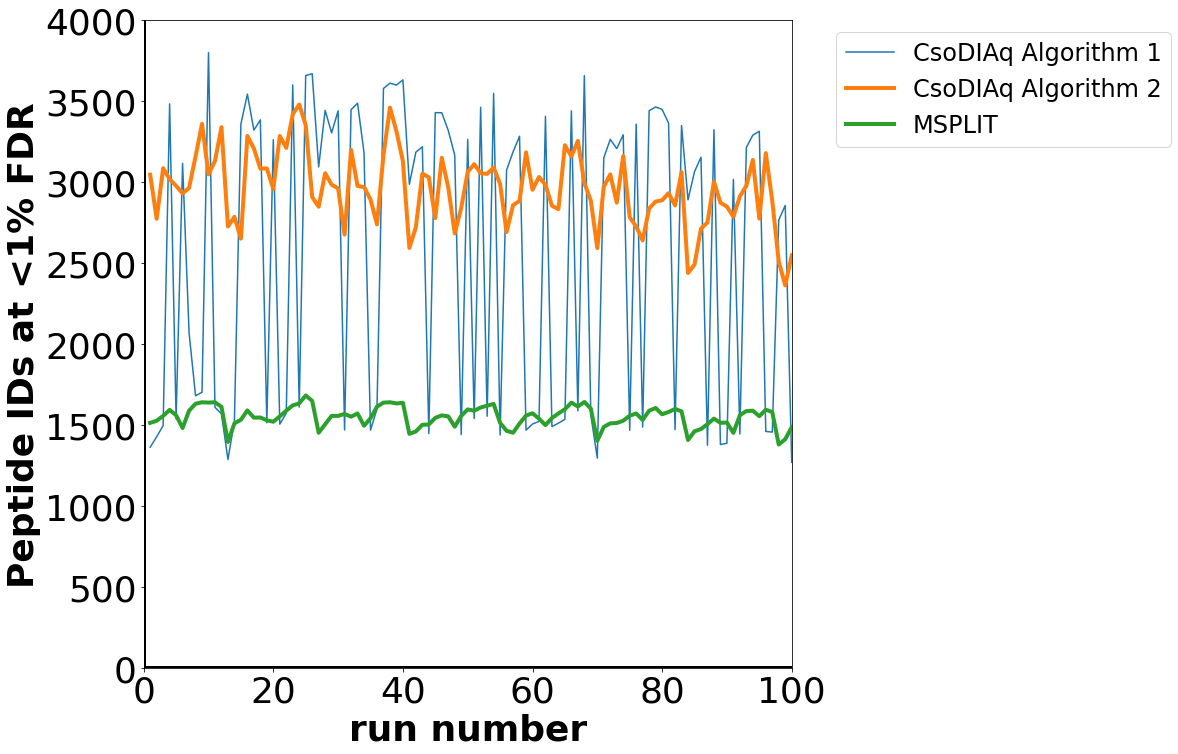

In [14]:
tempDf = scoreDf[scoreDf.type.isin(isin)]
graph = tempDf.pivot(index='run', columns='type', values='num of hits')
set_plot_settings('run number', 'Peptide IDs at <1% FDR')

pyplot.plot(graph.index,graph['csoDIAq, corrected 6'], label='CsoDIAq Algorithm 1')
pyplot.plot(graph.index,graph['Score5_match5rootXcosine, corrected'],lw=4, label='CsoDIAq Algorithm 2')
pyplot.plot(graph.index,graph['MSPLIT'],lw=4, label='MSPLIT')

#for x in graph.columns:
#    pyplot.plot(graph.index,graph[x], label=x)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.xlim(0,100)
pyplot.ylim(0,4000)
pyplot.savefig(filePath+'LineGraph_PeptideHitsAboveFDR.svg')
pyplot.savefig(filePath+'LineGraph_PeptideHitsAboveFDR.png')
pyplot.show()

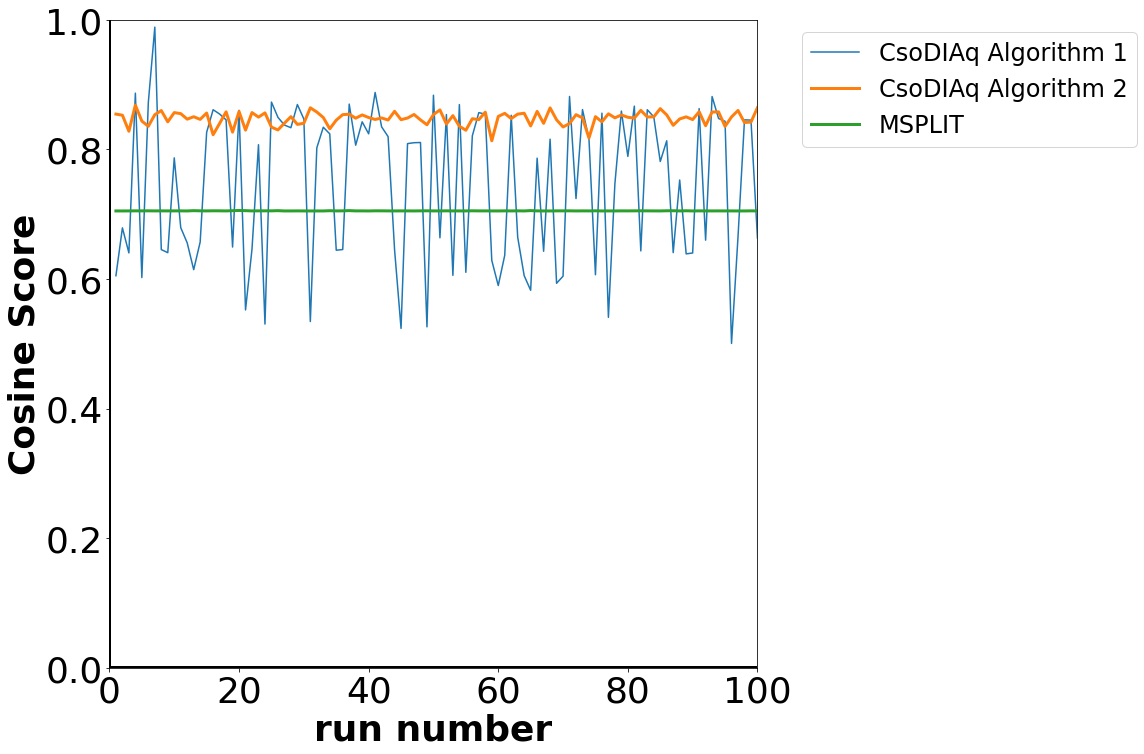

In [16]:
tempDf = scoreDf[scoreDf.type.isin(isin)]
graph = tempDf.pivot(index='run', columns='type', values='cosine')
set_plot_settings('run number', 'Cosine Score')
pyplot.plot(graph.index,graph['csoDIAq, corrected 6'], label='CsoDIAq Algorithm 1')
pyplot.plot(graph.index,graph['Score5_match5rootXcosine, corrected'],lw=3, label='CsoDIAq Algorithm 2')
pyplot.plot(graph.index,graph['MSPLIT'],lw=3, label='MSPLIT')

#for x in graph.columns:
#    pyplot.plot(graph.index,graph[x], label=x)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.ylim(0,1)
pyplot.xlim(0,100)

pyplot.savefig(filePath+'LineGraph_PeptideMinCosineAboveFDR.svg')
pyplot.savefig(filePath+'LineGraph_PeptideMinCosineAboveFDR.png')
pyplot.show()

In [18]:
proteins = []
head = 'Data/Output/'
files = [head+x for x in list(os.listdir(head)) if 'proteinFDR' in x]

for x in sorted(files):
    df = pd.read_csv(x)
    run = int(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-31peaks_exp-100reps-rep(\d{2,3})(_corrected)?(_\dSD)?_proteinFDR\.csv', r'\1', x))
    correct = bool(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-31peaks_exp-100reps-rep(\d{2,3})(_corrected)?(_\dSD)?_proteinFDR\.csv', r'\2', x))
    hits = len(set(df['leadingProtein']))
    proteins.append([run, hits, correct])
    
protDf = pd.DataFrame(proteins, columns = ['run','num of hits', 'type'])
protDf
    

,run,num of hits,type
0,1,707,True
1,1,374,False
2,2,745,True
3,2,478,False
4,3,776,True
5,3,635,False
6,4,788,True
7,4,554,False
8,5,755,True
9,5,633,False


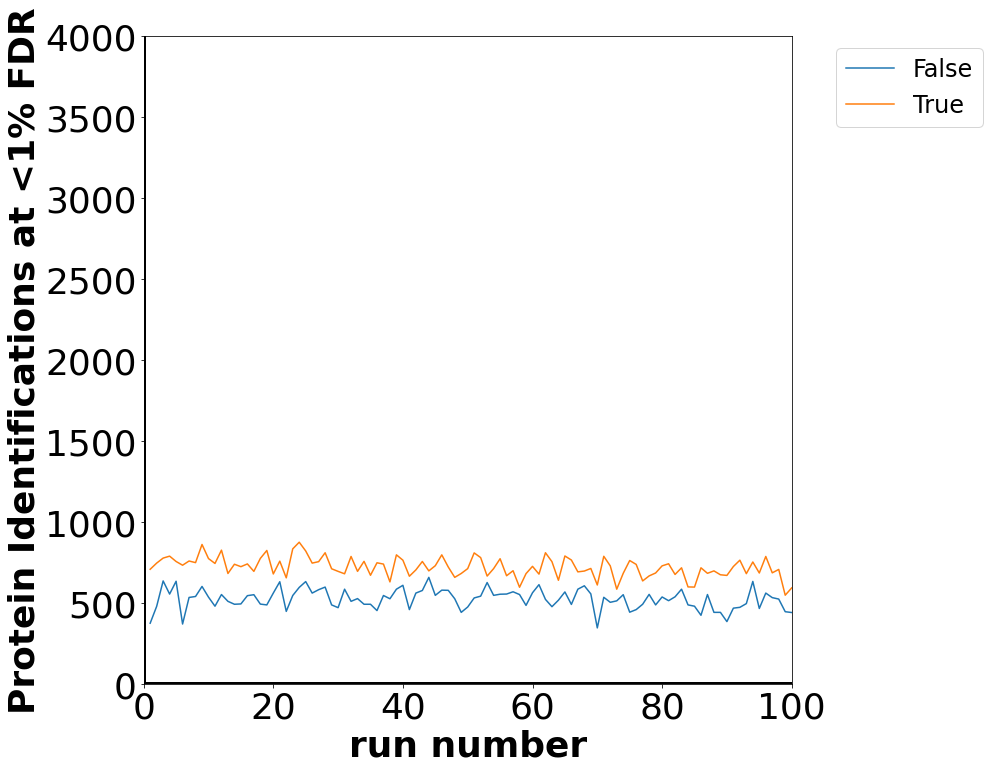

In [20]:
graph = protDf.pivot(index='run', columns='type', values='num of hits')
set_plot_settings('run number', 'Protein Identifications at <1% FDR')
for x in graph.columns:
    pyplot.plot(graph.index,graph[x], label=x)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.ylim(0,4000)
pyplot.xlim(0,100)


pyplot.savefig(filePath+'LineGraph_ProteinHitsAboveFDR.svg')
pyplot.savefig(filePath+'LineGraph_ProteinHitsAboveFDR.png')
pyplot.show()

In [21]:
print('Average # peptides, MSPLIT:')
tempDf = scoreDf[scoreDf['type']=='MSPLIT']
v = list(tempDf['num of hits'])
print(sum(v)/len(v))
print('standard deviation:' + str(statistics.pstdev(v)) + '\n')

print('Average # peptides, uncorrected, score 5:')
tempDf = scoreDf[scoreDf['type']=='Score5_match5rootXcosine, uncorrected']
v = list(tempDf['num of hits'])
print(sum(v)/len(v))
print('standard deviation:' + str(statistics.pstdev(v)) + '\n')

print('Average # peptides, corrected, score 5:')
tempDf = scoreDf[scoreDf['type']=='Score5_match5rootXcosine, corrected']
v = list(tempDf['num of hits'])
print(sum(v)/len(v))
print('standard deviation:' + str(statistics.pstdev(v)) + '\n')

print('Average # peptides, uncorrected, score 4:')
tempDf = scoreDf[scoreDf['type']=='Score4_match4rootXcosine, uncorrected']
v = list(tempDf['num of hits'])
print(sum(v)/len(v))
print('standard deviation:' + str(statistics.pstdev(v)) + '\n')

print('Average # peptides, corrected, score 4:')
tempDf = scoreDf[scoreDf['type']=='Score4_match4rootXcosine, corrected']
v = list(tempDf['num of hits'])
print(sum(v)/len(v))
print('standard deviation:' + str(statistics.pstdev(v)) + '\n')

print('Average # proteins, corrected, score 5:')
tempDf = protDf[protDf['type']==True]
v = list(tempDf['num of hits'])
print(sum(v)/len(v))
print('standard deviation:' + str(statistics.pstdev(v)) + '\n')

print('Average # proteins, uncorrected, score 5:')
tempDf = protDf[protDf['type']==False]
v = list(tempDf['num of hits'])
print(sum(v)/len(v))
print('standard deviation:' + str(statistics.pstdev(v)) + '\n')


Average # peptides, MSPLIT:
1549.13
standard deviation:63.60764969718658

Average # peptides, uncorrected, score 5:
2016.87
standard deviation:177.28618981748127

Average # peptides, corrected, score 5:
2958.52
standard deviation:224.07674935164513

Average # peptides, uncorrected, score 4:
2003.27
standard deviation:185.3397882269212

Average # peptides, corrected, score 4:
2988.99
standard deviation:227.46109535478809

Average # proteins, corrected, score 5:
720.01
standard deviation:61.7544322295979

Average # proteins, uncorrected, score 5:
523.78
standard deviation:61.71232940020981



## Histograms

In [171]:
peptideFDR = pd.read_csv('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-31peaks_exp-100reps-rep24_corrected_2SD.csv')
h = 'Data/Figures/testScoreHistogram_newScore_'

<Figure size 432x288 with 0 Axes>

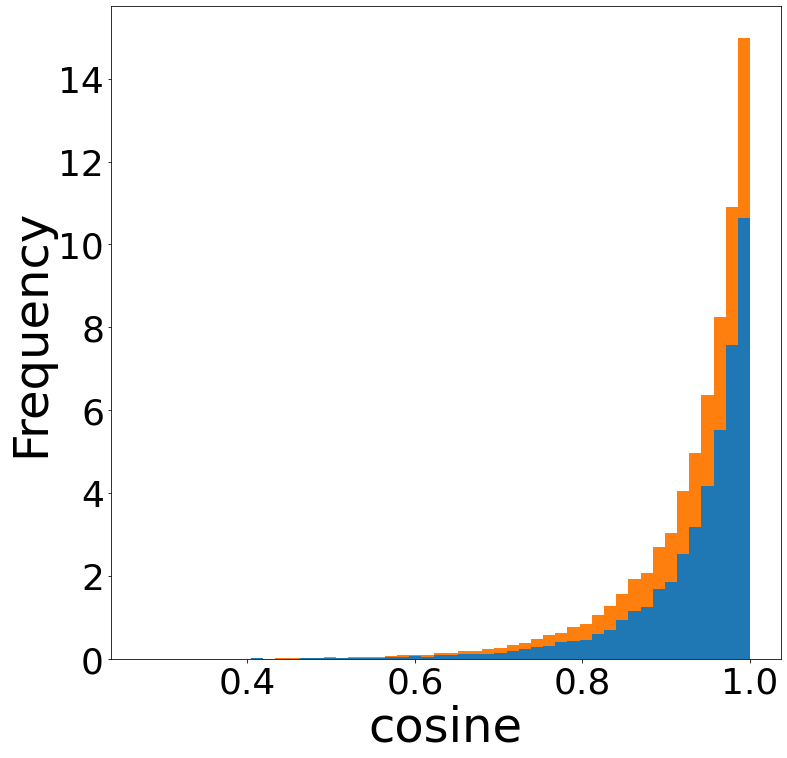

In [172]:
histogram(peptideFDR, h, 'cosine')
pyplot.savefig(filePath+'Histogram_CosineDistribution.svg')
pyplot.savefig(filePath+'Histogram_CosineDistribution.png')
pyplot.show()

<Figure size 432x288 with 0 Axes>

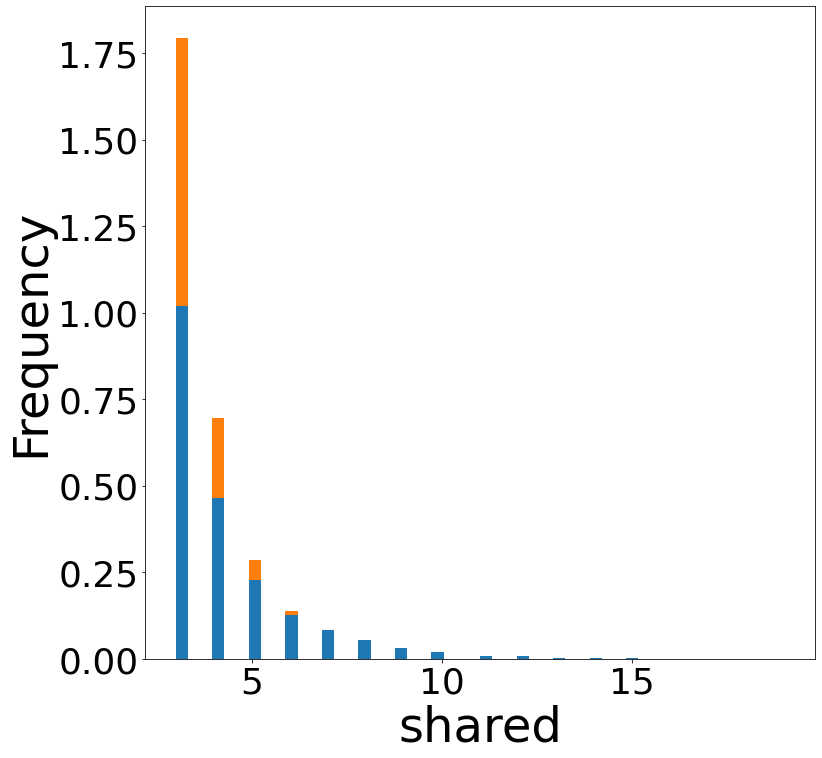

In [173]:
histogram(peptideFDR, h, 'shared')
pyplot.savefig(filePath+'Histogram_FragmentCountDistribution.svg')
pyplot.savefig(filePath+'Histogram_FragmentCountDistribution.png')
pyplot.show()

<Figure size 432x288 with 0 Axes>

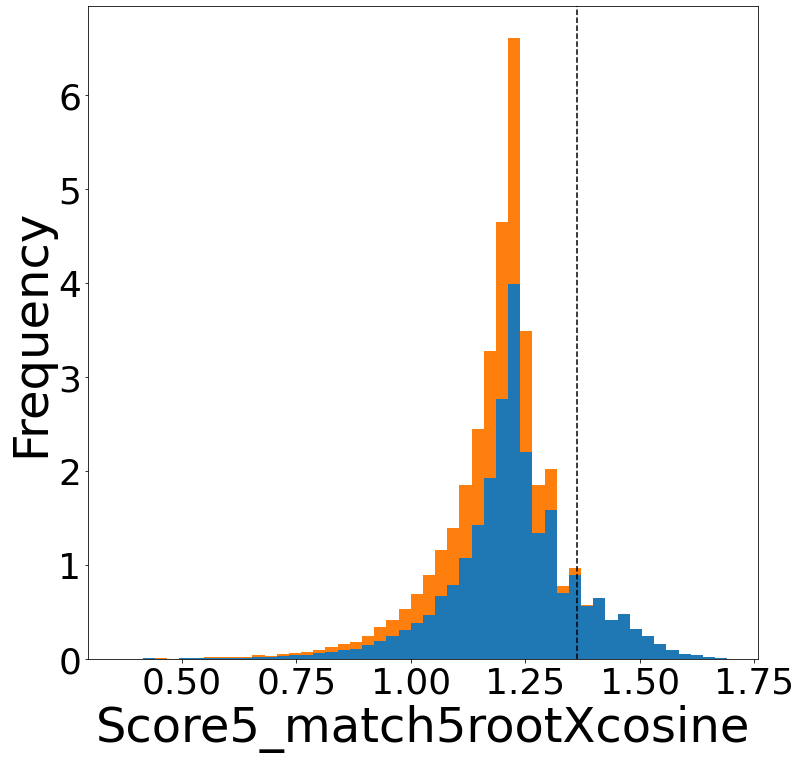

In [174]:
histogram(peptideFDR, h, 'Score5_match5rootXcosine', l=True)
pyplot.savefig(filePath+'Histogram_csoDIAqScoreDistribution.svg')
pyplot.savefig(filePath+'Histogram_csoDIAqScoreDistribution.png')
pyplot.show()